## 1. 화면 설계

<img src='https://github.com/teacher-jiejie/allinone_AI/blob/images/153_tkinter_hotplace.png?raw=true' width=700>


두 개 프레임으로 구성 가능

1.   메뉴 영역
2.   그래프 영역



## 2. 최종 완성 코드

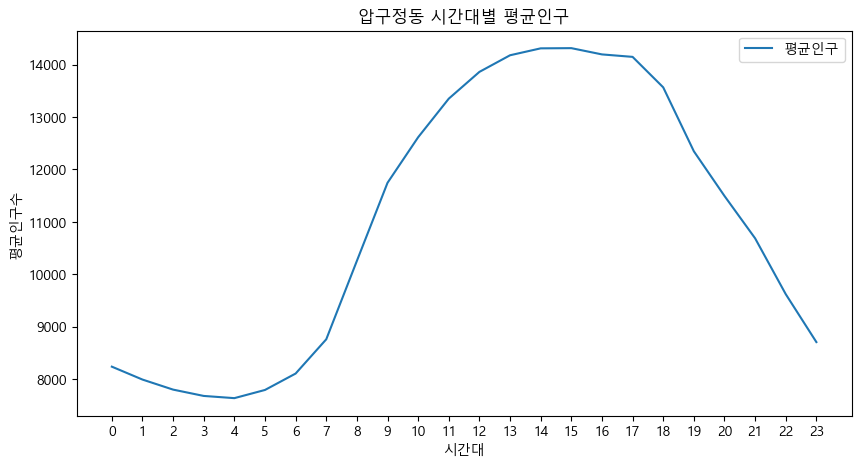

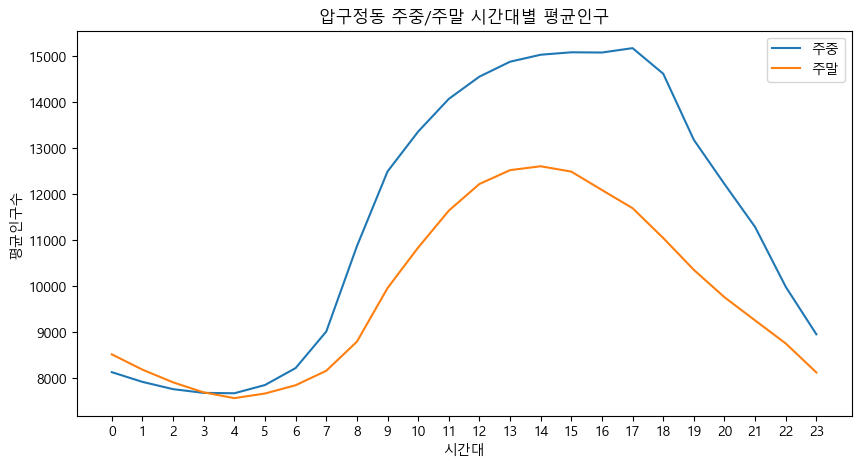

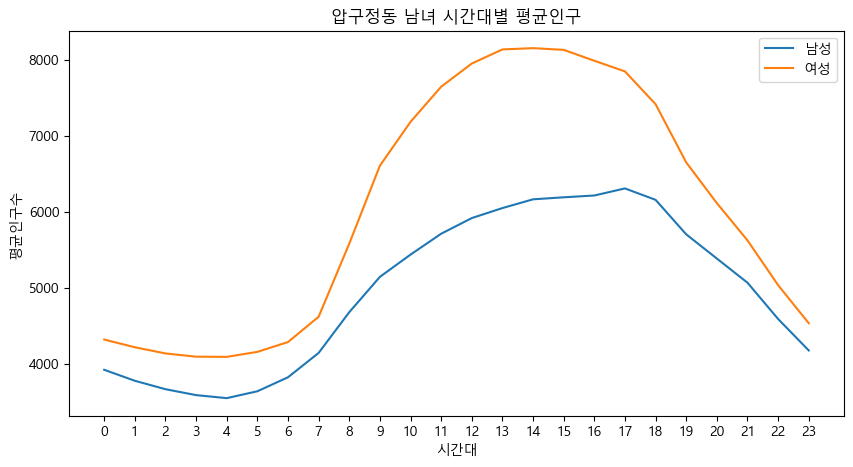

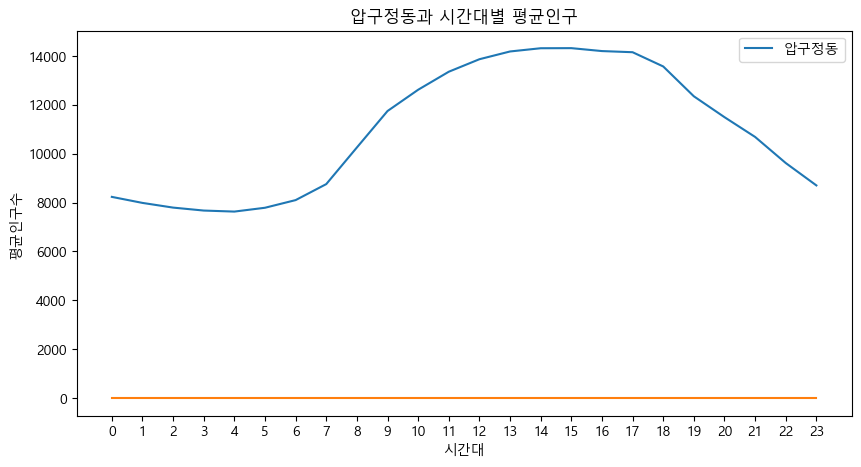

In [1]:
from tkinter import *
import csv 
import datetime
import matplotlib.pyplot as plt

# 전역 변수
dong_name1, dong_code1 = '', ''   # 핫플레이스가 있는 행정동명과 행정동코드
dong_name2, dong_code2 = '', ''   # 비교할 행정동명과 행정동코드

#################################################
# ----- 프로그램 기능 부분 -----
#################################################

#-------------------------------
# 1. 파일 읽기
#-------------------------------

def file_open():
    f = open('LOCAL_PEOPLE_DONG_201912.csv', encoding='utf8') # 또는 'eur-kr', 'CP949'
    data = csv.reader(f)
    next(data)
    data = list(data)

    f2 = open('dong_code.csv', encoding = 'utf8') # 또는 'eur-kr', 'CP949'
    code_data = csv.reader(f2)
    next(code_data)
    next(code_data)
    code_data = list(code_data)

    for row in data: 
        for i in range(1, 32): 
            if i <= 2:
                row[i] = int(row[i])
            else:
                row[i] = float(row[i])

    for row in code_data: 
        row[1] = int(row[1])

    return data, code_data

#-------------------------------
# 2. 행정동코드 찾기
#-------------------------------
def dong_search1(): 
    global dong_name1, dong_code1
    dong_name1 = dong_ent1.get()
    
    for row in code_data: 
        if row[-1] == dong_name1:
            dong_code1 = row[1]
    info.set(dong_name1 + '-' + str(dong_code1) + '를 분석합니다!')
    
# 비교할 행정동명을 행정동코드(dong_code2)로 변환하는 함수
def dong_search2(): 
    global dong_name2, dong_code2
    dong_name2 = dong_ent2.get()
    
    for row in code_data: 
        if row[-1] == dong_name2: 
            dong_code2 = row[1]  

    info.set(dong_name1 + '과 '+ dong_name2 + '를 비교합니다!')

#-------------------------------
# 3. 그래프 그리는 함수
#-------------------------------
def graph_plot(popu_list, label_list, graph_title):
    plt.figure(figsize=(10, 5)) # 그래프 크기 설정
    plt.rc('font', family='Malgun Gothic')
    plt.title(graph_title)
    for i in range(len(popu_list)): 
        plt.plot(range(24), popu_list[i], label=label_list[i])
    plt.legend()
    plt.xlabel('시간대')
    plt.ylabel('평균인구수')
    plt.xticks(range(24), range(24))
    plt.savefig('graph.png') # 결과 그래프를 이미지로 저장하기
    plt.show()

    # 그래프 이미지를 PhotoImage의 객체로 만들고, graph_lbl 레이블에 표시하기
    graph_img = PhotoImage(file='graph.png')
    graph_lbl.configure(image=graph_img)
    graph_lbl.image = graph_img

#-------------------------------
# 하위목표 1
#-------------------------------
def analysis1(graph_yn = 'y'):
    population = [0 for i in range(24)]
    for row in data: 
        if row[2] == dong_code1: 
            time, p = row[1], row[3]
            population[time] += p
    population = [p/31 for p in population]
    if graph_yn == 'n': 
        return population

    population = [population]
    labels = ['평균인구']
    title = dong_name1 + ' 시간대별 평균인구'
    graph_plot(popu_list = population, label_list = labels, graph_title = title)

#-------------------------------    
# 하위목표 2
#-------------------------------
def analysis2(): 
    # 4.1 입력된 행정동의 주중/주말 시간대별 평균인구 구하기
    weekday = [0 for i in range(24)]
    weekend = [0 for i in range(24)]

    for row in data: 
        if row[2] == dong_code1: 
            time, p = row[1], row[3]
            year, mon, day = int(row[0][:4]), int(row[0][4:6]), int(row[0][6:])
            num = datetime.date(year, mon, day).weekday()
            if num < 5: 
                weekday[time] += p
            else: 
                weekend[time] += p
 
    weekday_cnt, weekend_cnt = 0, 0
    for i in range(1, 32): 
        if datetime.date(2019,12,i).weekday() < 5:
            weekday_cnt += 1
        else: 
            weekend_cnt += 1

    weekday = [w/weekday_cnt for w in weekday]
    weekend = [w/weekend_cnt for w in weekend]

    # 4.2 4.1에서 구한 평균인구 리스트로 꺾은선 그래프 그리기 
    data_set = [weekday, weekend]
    labels = ['주중', '주말']
    title = dong_name1 + ' 주중/주말 시간대별 평균인구'
    graph_plot(popu_list = data_set, label_list = labels, graph_title = title)

#-------------------------------
# 하위목표 3
#-------------------------------
def analysis3(): 
    # 5.1 입력된 행정동의 남/녀 시간대별 평균인구 구하기
    male = [0 for i in range(24)]
    female = [0 for i in range(24)]

    for row in data: 
        if row[2] == dong_code1: 
            time = int(row[1])
            male[time] += sum(row[4:18])
            female[time] += sum(row[18:32])
    male = [m/31 for m in male]
    female = [f/31 for f in female]

    # 5.2 5.1에서 구한 평균인구 리스트로 꺾은선 그래프 그리기
    data_set = [male, female]
    labels = ['남성', '여성']
    title = dong_name1 + ' 남녀 시간대별 평균인구'
    graph_plot(popu_list = data_set, label_list = labels, graph_title = title)

#-------------------------------
# 하위목표 4
#-------------------------------
def analysis4():
    population1 = analysis1(graph_yn = 'n')
    population2 = [0 for i in range(24)]
    for row in data: 
        if row[2] == dong_code2: 
            time, p = row[1], row[3] 
            population2[time] += p
    population2 = [p/31 for p in population2]

    data_set = [population1, population2]
    labels = [dong_name1, dong_name2]
    title = dong_name1 + '과' + dong_name2 + ' 시간대별 평균인구'
    graph_plot(popu_list = data_set, label_list = labels, graph_title = title)


#################################################
# 프로그램 실행 부분
#################################################
data, code_data = file_open() #데이터 읽어서 다 변수에 넣어놔(생활데이터. 행정코드)


#################################################
# ----- 프로그램 화면 부분 -----
#################################################

root = Tk()
root.geometry('800x500')
root.title('핫플레이스는 언제 가야 가장 덜 붐빌까?')

#-------------------------------
# ----- 프레임 -----
#-------------------------------
Menu = Frame(root)
Menu.grid(row=0, column=0)
Graph = Frame(root)
Graph.grid(row=1, column=0)

#-------------------------------
# ----- 메뉴 프레임 -----
#-------------------------------
dong_ent1 = Entry(Menu, width=20)
dong_ent1.grid(row=0, column=0)

dong_btn1 = Button(Menu, text='핫플레이스 행정동 설정', width=20, command=dong_search1)
dong_btn1.grid(row=0, column=1)

dong_ent2 = Entry(Menu, width=20)
dong_ent2.grid(row=0, column=2)

dong_btn2 = Button(Menu, text='비교할 행정동 설정', width=20, command=dong_search2)
dong_btn2.grid(row=0, column=3)

info = StringVar()
dong_lbl = Label(Menu, textvariable=info, font=('Malgun Gothic', 12))
dong_lbl.grid(row=1, columnspan=4)

#-------------------------------
# ----- 그래프 프레임 -----
#-------------------------------
btn1 = Button(Graph, text='1. 시간대별 그래프', width=20, command=analysis1)
btn1.grid(row=0, column=0)

btn2 = Button(Graph, text='2. 주중/주말 그래프', width=20, command=analysis2)
btn2.grid(row=0, column=1)

btn3 = Button(Graph, text='3. 남/녀 그래프', width=20, command=analysis3)
btn3.grid(row=0, column=2)

btn4 = Button(Graph, text='4. 지역별 그래프', width=20, command=analysis4)
btn4.grid(row=0, column=3)

graph_lbl = Label(Graph)
graph_lbl.grid(row=1, column=0, columnspan=5)

root.mainloop()